<a href="https://colab.research.google.com/github/dhruvGhorpade/deeeplearning.fastai/blob/master/Teddy%20Classifier%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [0]:
path = Path(base_dir + 'data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_black.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/black'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/teddys'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_teddys.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/grizzly'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/urls_grizzly.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/cleaned.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/bears/export.pkl')]

In [0]:
classes = ['teddys','grizzly','black']

In [10]:
download_images(path/file, dest, max_pics=200)

In [11]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True, max_workers=8)

teddys


grizzly


black


In [0]:
np.random.seed(42)
data =ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [13]:
data.classes

['black', 'grizzly', 'teddys']

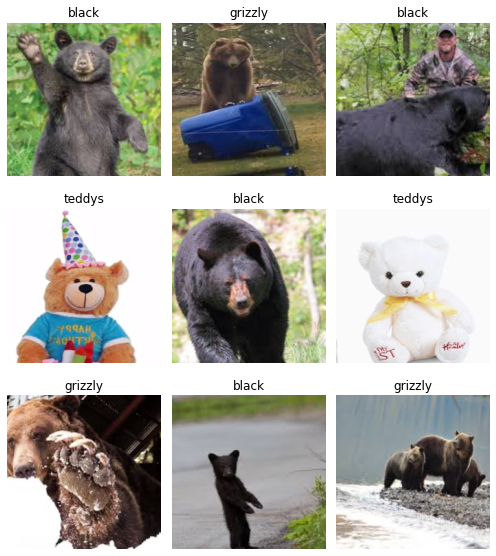

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 192, 48)

In [16]:
learn= create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.636347,0.128842,0.062500,00:03
1,0.880108,0.031851,0.020833,00:02
2,0.599052,0.033787,0.020833,00:02
3,0.449575,0.027127,0.020833,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


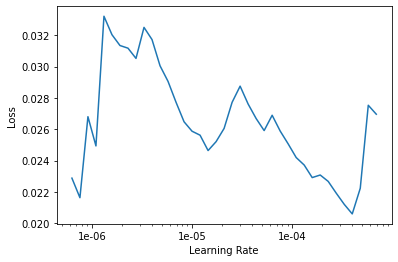

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.039246,0.011193,0.000000,00:03
1,0.022176,0.008599,0.000000,00:02


In [0]:
learn.save('stage-2')

In [24]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,teddys,teddys,teddys
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

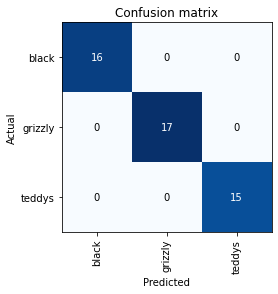

In [26]:
interp.plot_confusion_matrix()

In [0]:
 from fastai.widgets import *

 losses, idxs = interp.top_losses()
 top_loss_paths = data.valid_ds.x[idxs]

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [29]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/fastai-v3/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
??ImageCleaner

In [33]:
data.classes

['black', 'grizzly', 'teddys']

In [0]:
learn.export()

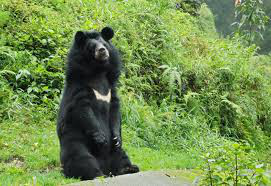

In [39]:
img = open_image(path/'black'/'00000001.jpg')
img

In [0]:
learn = load_learner(path)

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)